In [1]:
import numpy as np
import pylab as pl
from netCDF4 import Dataset
from collections import OrderedDict as OD
%matplotlib inline

In [2]:
try:
    iteritems = dict.iteritems
except AttributeError:
    iteritems = dict.items
    
def ds2dict(ds):
    out=OD()
    for varn, varv in iteritems(ds.variables):
        out[varn] = varv[:]+0.
    for grpn,grpv in iteritems(ds.groups):
        out[grpn] = ds2dict(grpv)
    return out
        
def simple_ncdf2dict(filename):
    with Dataset(filename) as ds:
            return ds2dict(ds)



(13,)


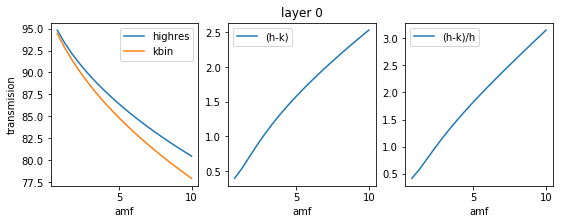

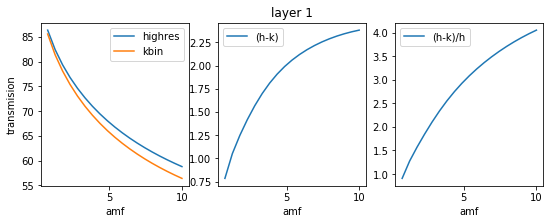

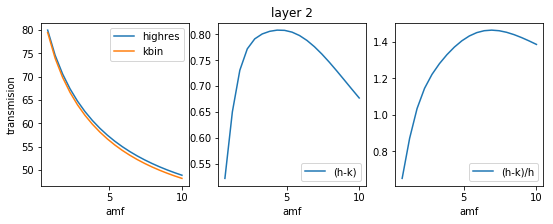

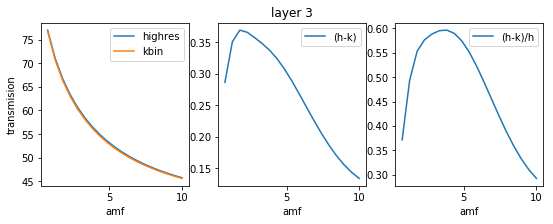

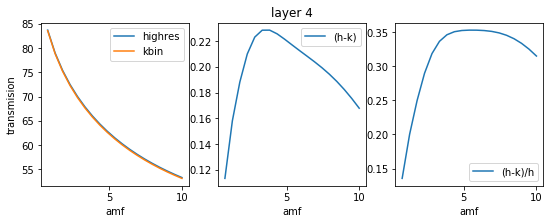

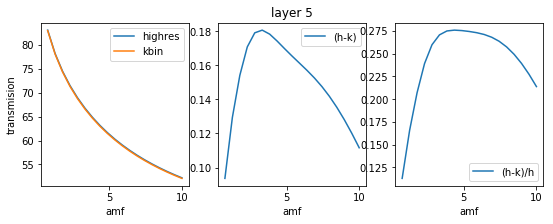

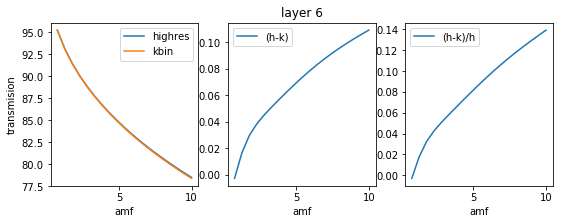

In [11]:
#d = simple_ncdf2dict('outdata/kbin_test.nc')
d = simple_ncdf2dict('outdata/kbin_test_multisort.nc')
def plot1(a,h,k,t):
    pl.figure(figsize=(9,3))
    pl.subplot(1,3,1)
    pl.plot(a,h*100,label='highres')
    pl.plot(a,k*100,label='kbin')
    pl.xlabel('amf')
    pl.ylabel('transmision')
    pl.legend()
    pl.subplot(1,3,2)
    pl.plot(a,(h-k)*100,label='(h-k)')
    pl.xlabel('amf')
    #pl.ylabel('transmision')
    pl.title(t)
    pl.legend()
    pl.subplot(1,3,3)
    pl.plot(a,(h-k)/(h)*100,label='(h-k)/h')
    pl.xlabel('amf')
    #pl.ylabel('[%]')
    pl.legend()

def plot2():
    for i in d['kb']['lay']: 
        plot1(d['kb']['amf'],d['kb']['ttl_trans_tot'][int(i)]
              ,d['kb']['ttl_ave_trans_tot'][int(i)],'top to layer %i'%i) 
def plot3():
    for i in d['kb']['lay']: 
        plot1(d['kb']['amf'],d['kb']['lay_trans_tot'][int(i)]
              ,d['kb']['lay_ave_trans_tot'][int(i)],'layer %i'%i) 

#plot1(d['kb']['amf'],d['kb']['toa_trans_tot'],d['kb']['toa_ave_trans_tot'],'TOA')
#plot1(d['kb']['amf'],d['kb']['ttl_trans_tot'][-1],d['kb']['ttl_ave_trans_tot'][-1],'2')
plot3()
#plot2()
print (d['kb']['weight'].shape)

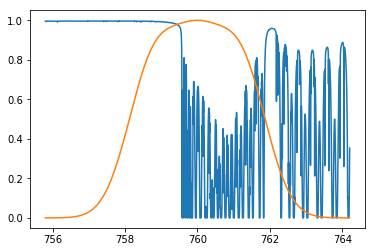

In [5]:
#pl.plot(d['kb']['wvl'],np.log10(0.01+d['kb']['toa_opt_tot']))
pl.plot(d['kb']['wvl'],np.exp(-d['kb']['toa_opt_tot']))
pl.plot(d['kb']['wvl'],d['kb']['rsr'])
#pl.xlim(758.5,763.)

In [37]:
a =[1,2,3,4]

In [38]:
1./(1./1.e4)

10000.0

In [39]:
b=' 1217514.330916 2.288E-28 1.049E-03.09570.456   94.79210.710.001400         -2-2-2          0 0 0  3 -2 -2        2  1  1      044133993695712242     7.0    5.0'
a

[1, 2, 3, 4]

In [40]:
d.keys()

odict_keys(['input', 'cgs', 'vtp', 'rsr', 'sol', 'kb'])

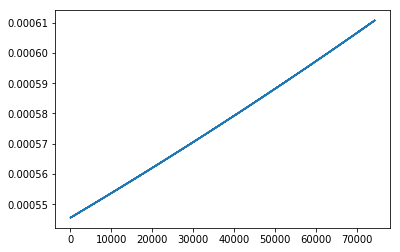

In [5]:
pl.plot(d['cgs']['wvl'][1:]-d['cgs']['wvl'][:-1])

(0.0003, 0.0007)

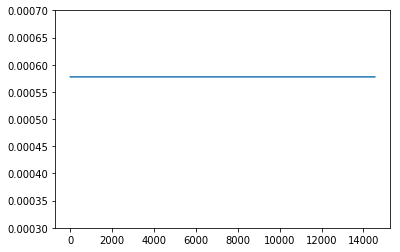

In [6]:
pl.plot(d['kb']['wvl'][1:]-d['kb']['wvl'][:-1])
pl.ylim(0.0003,0.0007)